SHOWING COLUMNS


In [ ]:
import pandas as pd
df = pd.read_excel("/content/MF_Behavior.xlsx")
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Investor_ID', 'Longevity', 'Female', 'Age', 'Income', 'ProfManage',
       'Diversification', 'Affordability', 'Liquidity', 'Growth',
       'Trustworthiness', 'Technology', 'Integrity', 'BrandValue', 'AUM'],
      dtype='object')


MAXIMUM LIKELIHOOD MODEL

In [ ]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_excel("/content/MF_Behavior.xlsx")
dependent_variable_column = 'Longevity'
independent_variable_columns = ['Female', 'Age', 'Income', 'ProfManage',
                                 'Diversification', 'Affordability', 'Liquidity',
                                 'Growth', 'Trustworthiness', 'Technology',
                                 'Integrity', 'BrandValue', 'AUM']
X = sm.add_constant(df[independent_variable_columns])
model = sm.OLS(df[dependent_variable_column], X)
result = model.fit()

# Display the results
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     6224.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:18:06   Log-Likelihood:                -1215.3
No. Observations:                1000   AIC:                             2459.
Df Residuals:                     986   BIC:                             2527.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.3951      0.540     

PLOTS

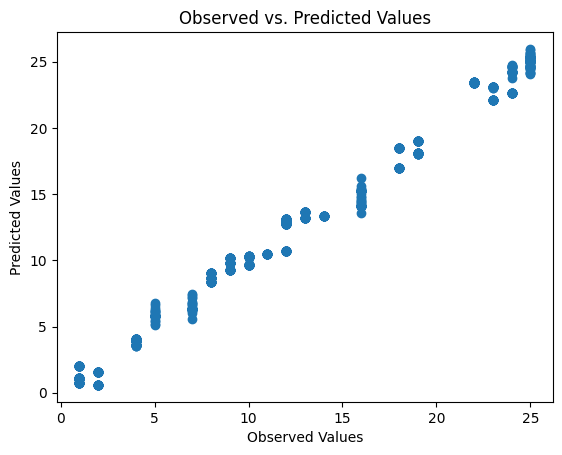

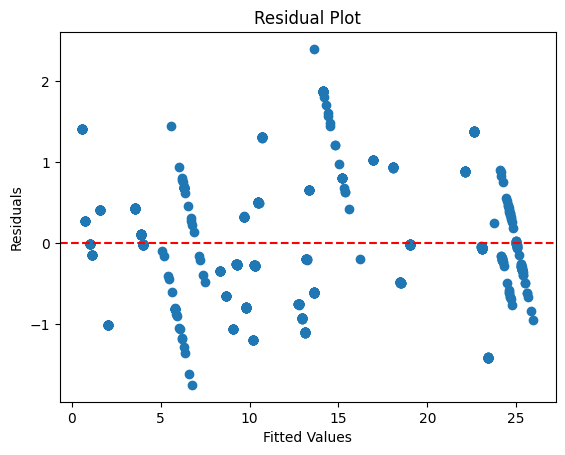

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_excel("/content/MF_Behavior.xlsx")
# Define the actual column names
dependent_variable_column = 'Longevity'
independent_variable_columns = ['Female', 'Age', 'Income', 'ProfManage',
                                 'Diversification', 'Affordability', 'Liquidity',
                                 'Growth', 'Trustworthiness', 'Technology',
                                 'Integrity', 'BrandValue', 'AUM']
X = sm.add_constant(df[independent_variable_columns])
model = sm.OLS(df[dependent_variable_column], X)
result = model.fit()
plt.scatter(df[dependent_variable_column], result.fittedvalues)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs. Predicted Values')
plt.show()
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


UNSUPERVISED LEARNING AND CLUSTERING

   Investor_ID  Longevity  Female  Age  Income  ProfManage  Diversification  \
0            1          1       0    1       1           1                2   
1            2          2       0    1       1           2                1   
2            3          8       0    2       1           0                1   
3            4          8       0    2       1           1                2   
4            5         18       0    3       1           2                0   

   Affordability  Liquidity  Growth  Trustworthiness  Technology  Integrity  \
0              6          4       3                3           5          2   
1              6          3       4                2           6          2   
2              7          5       3                3           3          4   
3              6          5       4                4           2          4   
4              7          7       3                6           0          6   

   BrandValue     AUM  
0           2   98062  
1 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


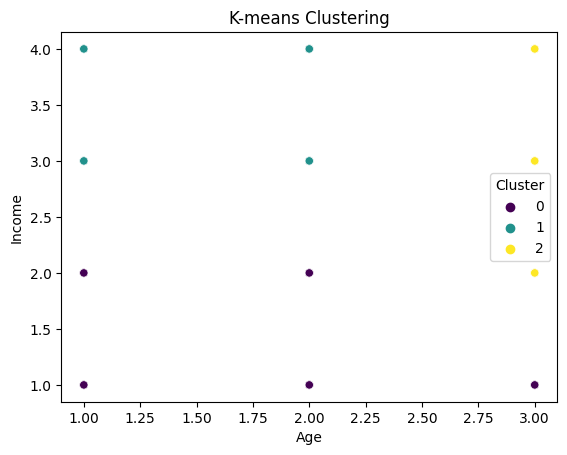

Cluster Centers:
   Longevity    Female       Age    Income  ProfManage  Diversification  \
0   7.051282  0.435897  1.692308  1.589744    2.435897         2.307692   
1  10.203966  0.453258  1.611898  3.263456    3.056657         4.288952   
2  22.132296  0.350195  3.000000  2.988327    6.132296         5.579767   

   Affordability  Liquidity    Growth  Trustworthiness  Technology  Integrity  \
0       5.256410   4.871795  4.461538         2.794872    5.025641   2.692308   
1       1.603399   2.643059  5.407932         4.116147    3.937677   3.399433   
2       1.571984   2.284047  6.140078         6.116732    2.054475   6.229572   

   BrandValue           AUM  
0    2.871795  1.203598e+06  
1    3.526912  3.954465e+06  
2    6.202335  9.143764e+06  


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/MF_Behavior.xlsx'
df = pd.read_excel(file_path)
print(df.head())
features = df[['Longevity', 'Female', 'Age', 'Income', 'ProfManage',
               'Diversification', 'Affordability', 'Liquidity', 'Growth',
               'Trustworthiness', 'Technology', 'Integrity', 'BrandValue', 'AUM']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering')
plt.show()
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)
print("Cluster Centers:")
print(cluster_centers_df)


Foundation of Supervised Learning Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
file_path = '/content/MF_Behavior.xlsx'
df = pd.read_excel(file_path)
features = df[['Longevity', 'Female', 'Age', 'Income', 'ProfManage',
               'Diversification', 'Affordability', 'Liquidity', 'Growth',
               'Trustworthiness', 'Technology', 'Integrity', 'BrandValue']]
target = df['AUM']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2846936691156.8086


Plots

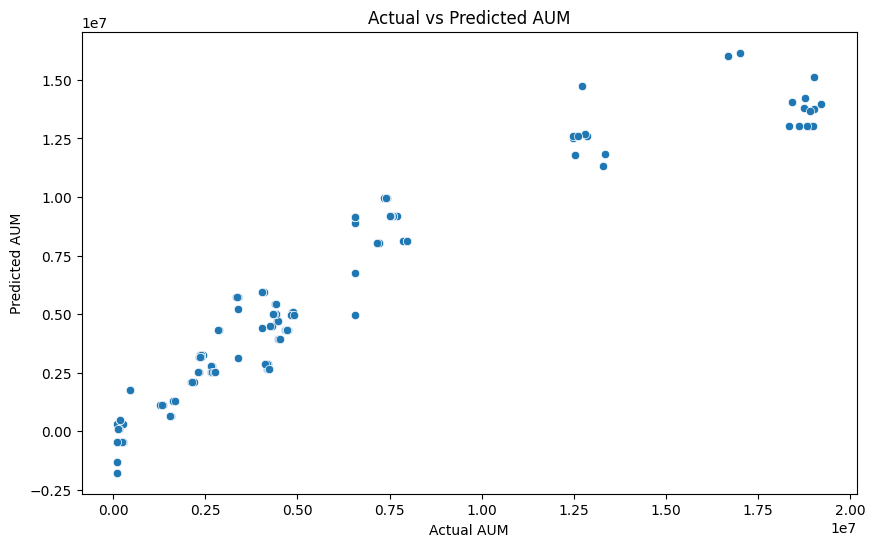

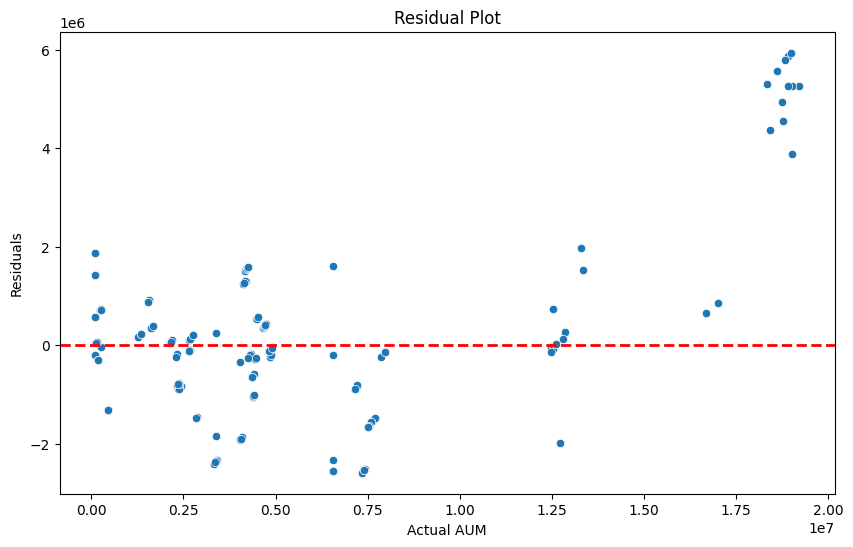

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.title('Actual vs Predicted AUM')
plt.show()
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual AUM')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Decision Trees

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
file_path = '/content/MF_Behavior.xlsx'
df = pd.read_excel(file_path)
features = df[['Longevity', 'Female', 'Age', 'Income', 'ProfManage',
               'Diversification', 'Affordability', 'Liquidity', 'Growth',
               'Trustworthiness', 'Technology', 'Integrity', 'BrandValue']]
target = df['AUM']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 11419955625.398727


Plots

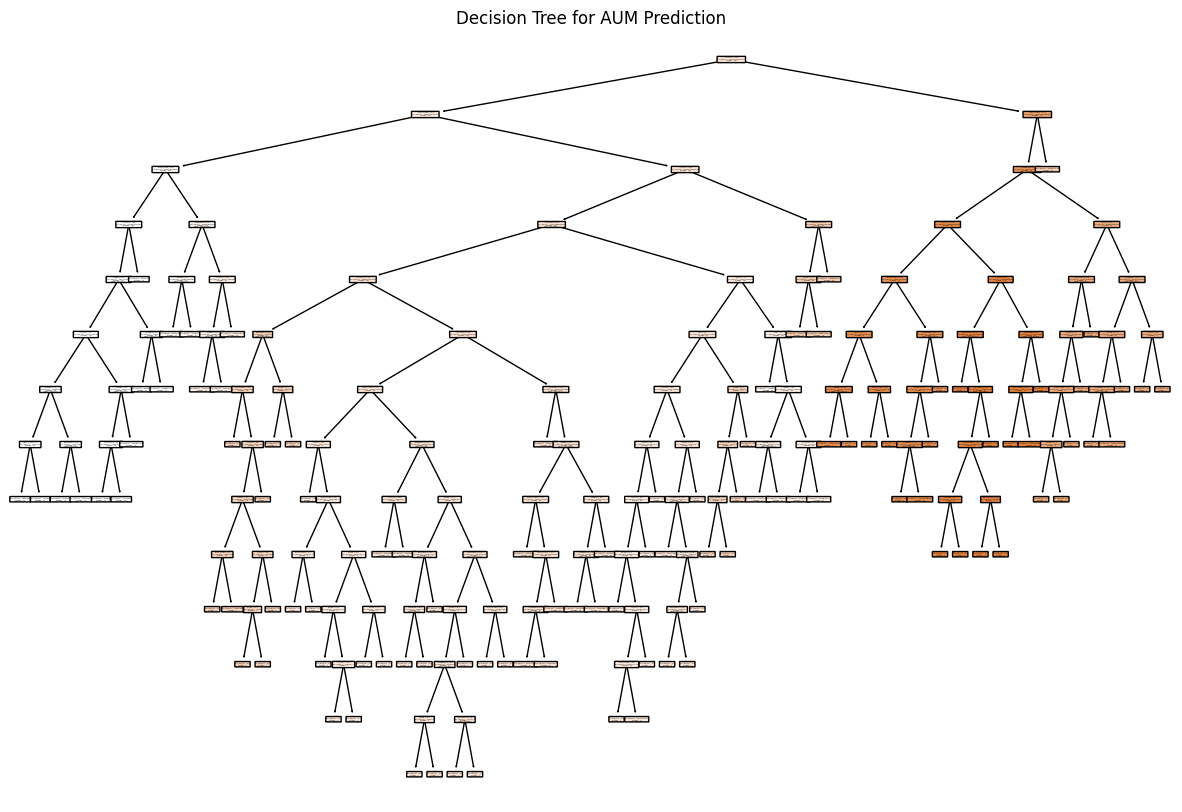

In [ ]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features.columns, filled=True, rounded=True)
plt.title('Decision Tree for AUM Prediction')
plt.show()


Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
file_path = '/content/MF_Behavior.xlsx'
df = pd.read_excel(file_path)
features = df[['Longevity', 'Female', 'Age', 'Income', 'ProfManage',
               'Diversification', 'Affordability', 'Liquidity', 'Growth',
               'Trustworthiness', 'Technology', 'Integrity', 'BrandValue']]
target = df['AUM']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 32399744303104.0000 - val_loss: 48128518520832.0000
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 32399714942976.0000 - val_loss: 48128463994880.0000
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 32399658319872.0000 - val_loss: 48128346554368.0000
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 32399530393600.0000 - val_loss: 48128103284736.0000
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 32399312289792.0000 - val_loss: 48127696437248.0000
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 32398926413824.0000 - val_loss: 48127025348608.0000
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 32398339211264.0000 - val_loss: 48126014521344.0000
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 32397473087488.0000 - val_loss: 48124584263680.0000
Epoch 9

plots

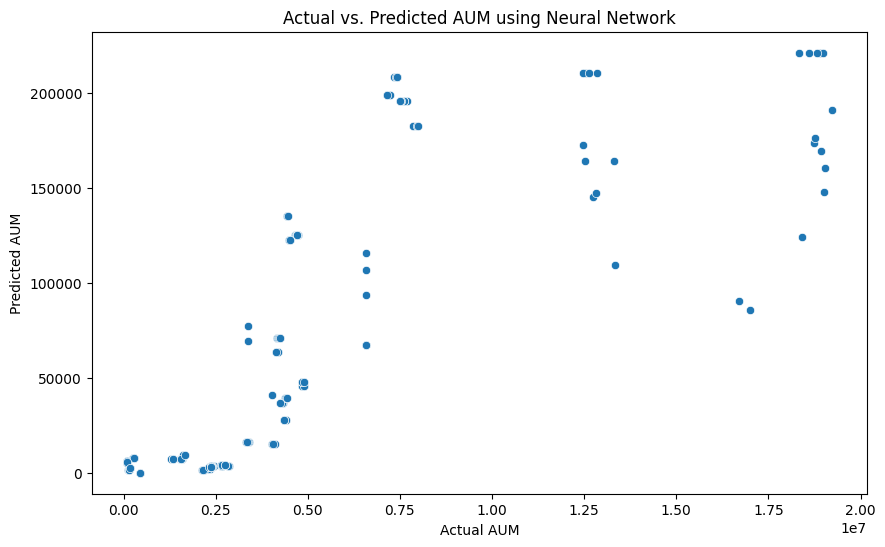

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=result_df)
plt.title('Actual vs. Predicted AUM using Neural Network')
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.show()


plot 2

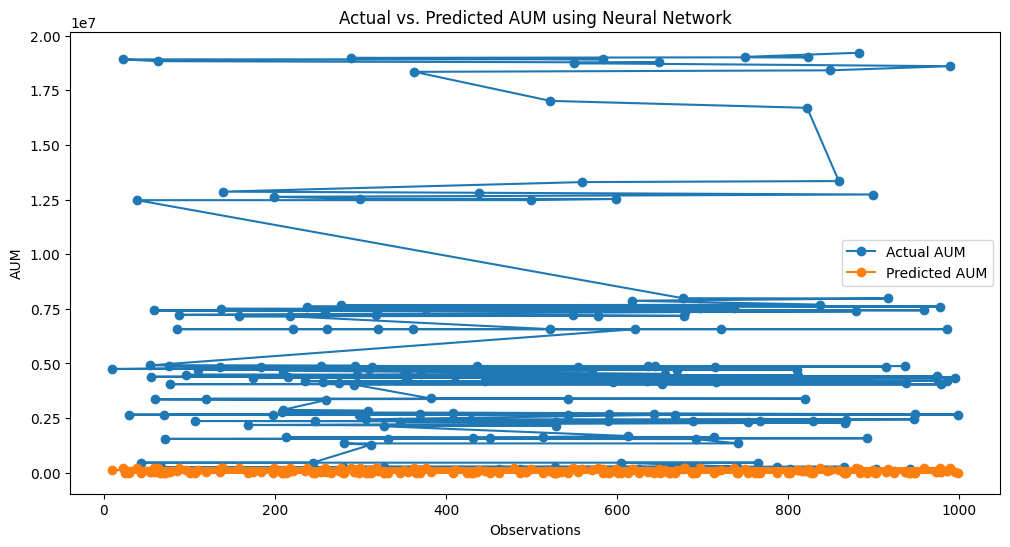

In [ ]:

result_df = result_df.sort_values(by='Actual')
# Line plot
plt.figure(figsize=(12, 6))
plt.plot(result_df['Actual'], label='Actual AUM', marker='o')
plt.plot(result_df['Predicted'], label='Predicted AUM', marker='o')
plt.title('Actual vs. Predicted AUM using Neural Network')
plt.xlabel('Observations')
plt.ylabel('AUM')
plt.legend()
plt.show()
